## Wind Turbine Prediction

### Data Processing

In [2]:
from lightgbm import LGBMRegressor
from DataProcessor import DataProcessor
from Trainer import Trainer, get_MAPE, get_SMAPE
from AnomalyDetector import AnomalyDetector
# choose ML model for time series
MODEL =  LGBMRegressor(random_state=42)
PARAM_GRID = {
            'num_leaves': [16, 24, 31],
            'learning_rate': [0.005, 0.01, 0.05],
            'n_estimators': [32, 100],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            }


Turbine = DataProcessor('Turbine1.csv', 'Turbine2.csv')

# Clean and reorder data for Turbine1 and Turbine2
Turbine.df1 = Turbine.clean(Turbine.df1)
Turbine.df2 = Turbine.clean(Turbine.df2)

# Create additional time series features
Turbine.df1 = Turbine.add_features(Turbine.df1)
Turbine.df2 = Turbine.add_features(Turbine.df2)
    
# Combine and aggregate the data
combined_data = Turbine.aggregate()

c:\Users\manaf\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\manaf\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\manaf\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13103 entries, 2016-01-01 00:10:00 to 2016-03-31 23:50:00
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Wind       13103 non-null  float64
 1   Rotor      13103 non-null  float64
 2   Leistung   13103 non-null  float64
 3   Azimut     13103 non-null  float64
 4   Prod. 1    13103 non-null  float64
 5   Prod. 2    13103 non-null  float64
 6   Gen1-      13103 non-null  float64
 7   Lager      13103 non-null  float64
 8   Außen      13103 non-null  float64
 9   GetrT      13103 non-null  float64
 10  Status     13103 non-null  float64
 11  Spann      13103 non-null  float64
 12  Spann.1    13103 non-null  float64
 13  Spann.2    13103 non-null  float64
 14  Strom-     13103 non-null  float64
 15  Strom-.1   13103 non-null  float64
 16  Strom-.2   13103 non-null  float64
 17  CosPh      13103 non-null  float64
 18  Abgabe     13103 non-null  float64
 19  Bezug      

### Prediction

In [1]:

# initiate Trainer class
trainer = Trainer(combined_data)
# Auto feature selection
trainer.features = trainer.select_features(n= 10) #Or set it manually e.g: ["Wind"]   

# Split data into train and test sets
x_train, x_test, y_train, y_test = trainer.data_splitter()
# fine tune via GridSearch
MODEL = trainer.tune(PARAM_GRID, MODEL, x_train, y_train)
# Train and evaluate the model
lgb_model = trainer.train(MODEL, x_train, y_train)
sampe, mape, mae = trainer.evaluate(lgb_model, x_test, y_test)

print("MAPE:", mape)
print("SMAPE:", sampe)
print("MAE:", mae)
    


c:\Users\manaf\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\manaf\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\manaf\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 10482, number of used features: 10
[LightGBM] [Info] Start training from score 444.713280
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 10482, number of used features: 10
[LightGBM] [Info] Start training from score 444.713280
MAPE: 2.3722573979817843
SMAPE: 0.2182582118955713
MAE: 5.461608657594677


## Anomaly Detection 

In [36]:
from AnomalyDetector import AnomalyDetector

# Instantiate AnomalyDetector
anomaly_detector = AnomalyDetector(Turbine.df1)  # choosing Turbine1 for example
# Fit the Isolation Forest model
anomaly_detector.fit_model()
# Detect anomalies
anomaly_table = anomaly_detector.detect_anomalies()

c:\Users\manaf\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [37]:
anomaly_detector.data[['Wind', 'anomaly']].head()

,Wind,anomaly
Dat/Zeit,,
2016-01-01 00:10:00,5.8,-1
2016-01-01 00:20:00,5.8,-1
2016-01-01 00:30:00,5.8,-1
2016-01-01 00:40:00,6.4,-1
2016-01-01 00:50:00,6.9,-1


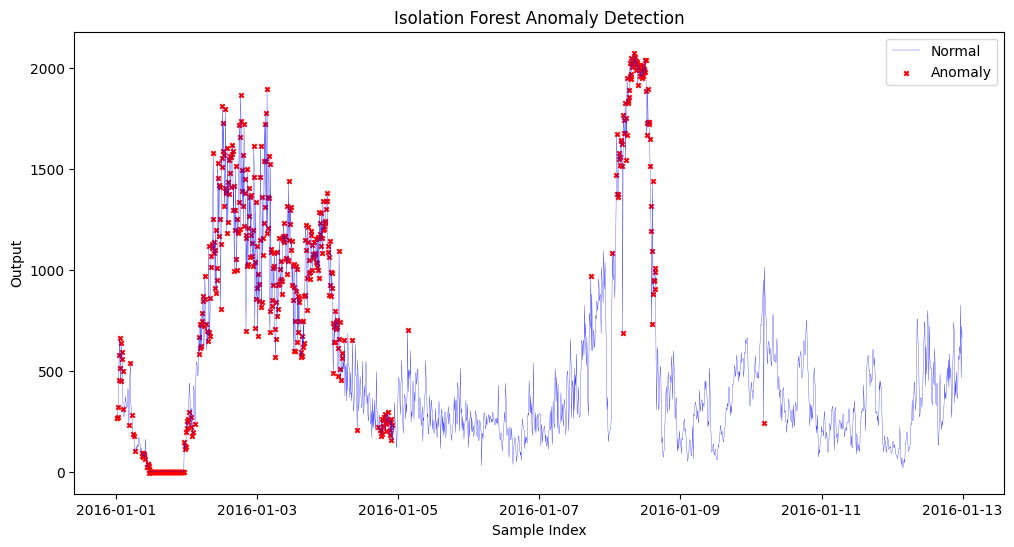

In [38]:
# Visualize anomalies
anomaly_detector.visualize_anomalies(until_date= '2016-1-13')

## t-SNE Feature Visualization

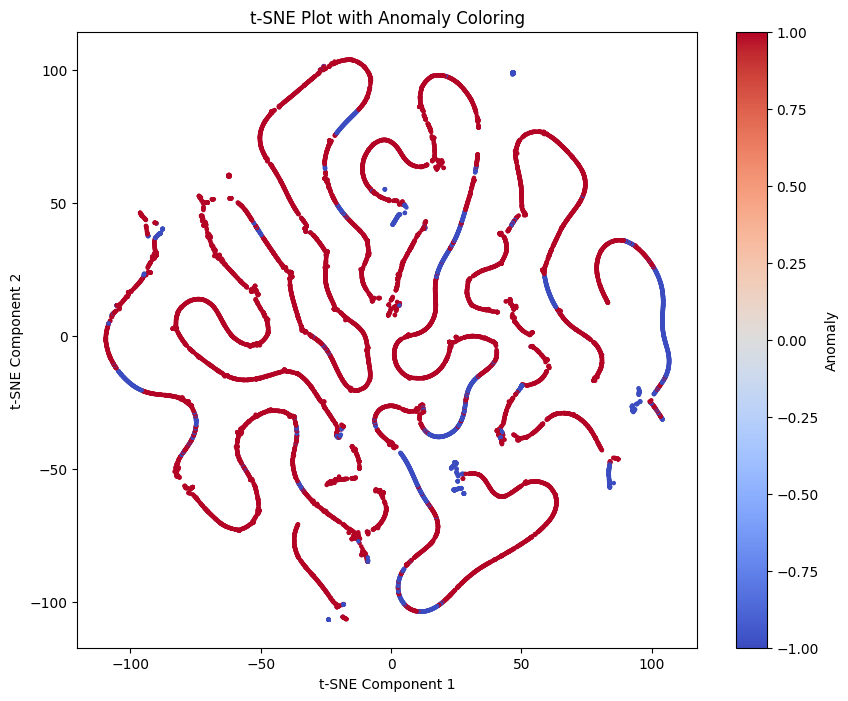

In [39]:
# show t-SNE
anomaly_detector.visualize_tsne()